*Data Understanding and Cleaning*

In [101]:
# required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# add CSV
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

In [80]:
# preview rows, check for null, list column names 
df.head()
df.info()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

In [81]:
# clean columns 
columns_to_clean = ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']

for col in columns_to_clean:
    df[col] = df[col].str.strip().str.title()

In [82]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,Vpn,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-In-The-Middle,It,38.65,605895,Hacker Group,Weak Passwords,Vpn,20
3,Uk,2024,Ransomware,Telecommunications,41.44,659320,Nation-State,Social Engineering,Ai-Based Detection,7
4,Germany,2018,Man-In-The-Middle,It,74.41,810682,Insider,Social Engineering,Vpn,68


In [100]:
# Check and remove duplicate rows, then confirm updated DataFrame shape
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows", num_duplicates) 
df = df.drop_duplicates(keep='first')
print("New dataframe shape:", df.shape)

Number of duplicate rows 0
New dataframe shape: (3000, 11)


In [84]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,Vpn,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-In-The-Middle,It,38.65,605895,Hacker Group,Weak Passwords,Vpn,20
3,Uk,2024,Ransomware,Telecommunications,41.44,659320,Nation-State,Social Engineering,Ai-Based Detection,7
4,Germany,2018,Man-In-The-Middle,It,74.41,810682,Insider,Social Engineering,Vpn,68


In [85]:
# convert year from int to categorical 
print(df['Year'].dtype)
df['Year']= df['Year'].astype('category')
print(df['Year'].dtype)

int64
category


In [86]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,Vpn,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-In-The-Middle,It,38.65,605895,Hacker Group,Weak Passwords,Vpn,20
3,Uk,2024,Ransomware,Telecommunications,41.44,659320,Nation-State,Social Engineering,Ai-Based Detection,7
4,Germany,2018,Man-In-The-Middle,It,74.41,810682,Insider,Social Engineering,Vpn,68


In [87]:
# Display descriptive statistics for selected numeric columns
numeric_columns = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
print(numeric_columns[0] + ' - Description:')
print(df[numeric_columns[0]].describe())

print(numeric_columns[1] + ' - Description:')
print(df[numeric_columns[1]].describe())

print(numeric_columns[2] + ' - Description:')
print(df[numeric_columns[2]].describe())

negative_count_0 = (df[numeric_columns[0]] < 0).sum()
print(numeric_columns[0] + ' - Negative values: ' + str(negative_count_0))

negative_count_1 = (df[numeric_columns[1]] < 0).sum()
print(numeric_columns[1] + ' - Negative values: ' + str(negative_count_1))

negative_count_2 = (df[numeric_columns[2]] < 0).sum()
print(numeric_columns[2] + ' - Negative values: ' + str(negative_count_2))

Financial Loss (in Million $) - Description:
count    3000.000000
mean       50.492970
std        28.791415
min         0.500000
25%        25.757500
50%        50.795000
75%        75.630000
max        99.990000
Name: Financial Loss (in Million $), dtype: float64
Number of Affected Users - Description:
count      3000.000000
mean     504684.136333
std      289944.084972
min         424.000000
25%      255805.250000
50%      504513.000000
75%      758088.500000
max      999635.000000
Name: Number of Affected Users, dtype: float64
Incident Resolution Time (in Hours) - Description:
count    3000.000000
mean       36.476000
std        20.570768
min         1.000000
25%        19.000000
50%        37.000000
75%        55.000000
max        72.000000
Name: Incident Resolution Time (in Hours), dtype: float64
Financial Loss (in Million $) - Negative values: 0
Number of Affected Users - Negative values: 0
Incident Resolution Time (in Hours) - Negative values: 0


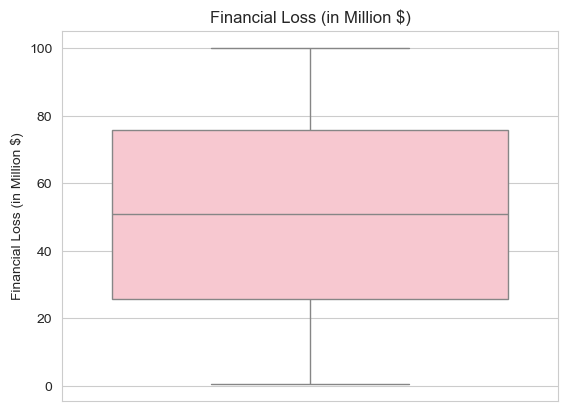

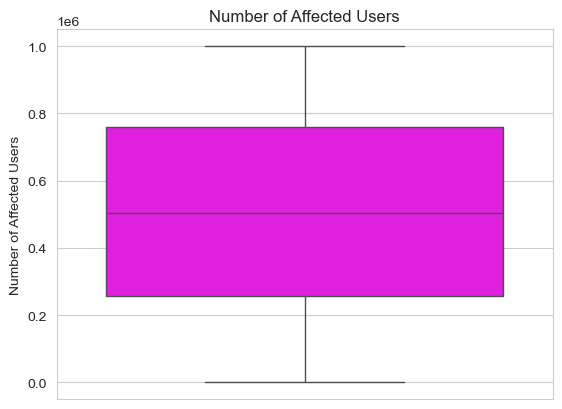

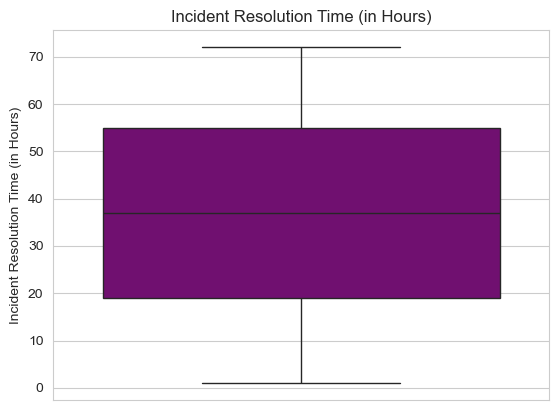

In [88]:
# Create boxplots to visualize distributions and outliers in key numeric variables
plt.figure()
sns.boxplot(y=df['Financial Loss (in Million $)'], color = 'pink')
plt.title('Financial Loss (in Million $)')
plt.ylabel('Financial Loss (in Million $)')
plt.show()

plt.figure()
sns.boxplot(y=df['Number of Affected Users'], color = 'magenta')
plt.title('Number of Affected Users')
plt.ylabel('Number of Affected Users')
plt.show()

plt.figure()
sns.boxplot(y=df['Incident Resolution Time (in Hours)'], color = 'purple')
plt.title('Incident Resolution Time (in Hours)')
plt.ylabel('Incident Resolution Time (in Hours)')
plt.show()

   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-In-The-Middle                  It   
3       Uk  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-In-The-Middle                  It   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-State   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    Vpn   
1          Unpatched Software               Firewall   
2              Weak 

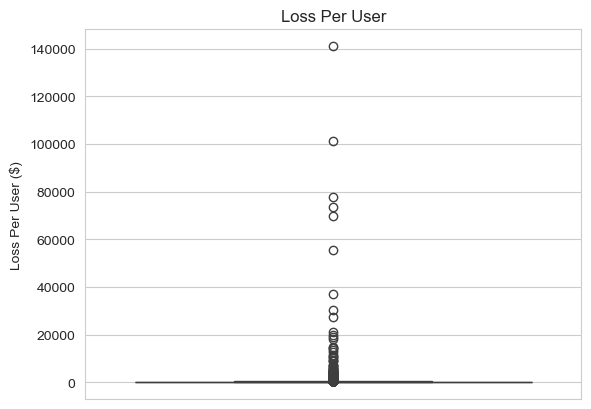

In [89]:
# Create 'Loss Per User' metric and visualize its distribution with a boxplot

df['Loss Per User'] = (df['Financial Loss (in Million $)'] * 1000000) / df['Number of Affected Users']

print(df.head())

print(df['Loss Per User'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.boxplot(y=df['Loss Per User'])
plt.title('Loss Per User')
plt.ylabel('Loss Per User ($)')
plt.show()

*Exploratory Data*

In [90]:
# Calculate and display counts and percentages for attack types, industries, and top countries

print("Attack Type - Counts:")
print(df['Attack Type'].value_counts())

print("\nAttack Type - Percentages:")
print(round(df['Attack Type'].value_counts(normalize=True) * 100, 2))

print("\nTarget Industry - Counts:")
print(df['Target Industry'].value_counts())

print("\nTarget Industry - Percentages:")
print(round(df['Target Industry'].value_counts(normalize=True) * 100, 2))

print("\nTop 10 Countries - Counts:")
print(df['Country'].value_counts().head(10))

print("\nTop 10 Countries - Percentages:")
print(round(df['Country'].value_counts(normalize=True).head(10) * 100, 2))

Attack Type - Counts:
Attack Type
Ddos                 531
Phishing             529
Sql Injection        503
Ransomware           493
Malware              485
Man-In-The-Middle    459
Name: count, dtype: int64

Attack Type - Percentages:
Attack Type
Ddos                 17.70
Phishing             17.63
Sql Injection        16.77
Ransomware           16.43
Malware              16.17
Man-In-The-Middle    15.30
Name: proportion, dtype: float64

Target Industry - Counts:
Target Industry
It                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64

Target Industry - Percentages:
Target Industry
It                    15.93
Banking               14.83
Healthcare            14.30
Retail                14.10
Education             13.97
Telecommunications    13.43
Government            13.43
Name: proportion, dtype: float64

Top 10 Countries - Counts:

*Data Visualization* 

                                     Financial Loss (in Million $)  \
Financial Loss (in Million $)                             1.000000   
Number of Affected Users                                  0.001787   
Incident Resolution Time (in Hours)                      -0.012671   
Loss Per User                                             0.083258   

                                     Number of Affected Users  \
Financial Loss (in Million $)                        0.001787   
Number of Affected Users                             1.000000   
Incident Resolution Time (in Hours)                  0.005893   
Loss Per User                                       -0.167098   

                                     Incident Resolution Time (in Hours)  \
Financial Loss (in Million $)                                  -0.012671   
Number of Affected Users                                        0.005893   
Incident Resolution Time (in Hours)                             1.000000   
Loss Per User      

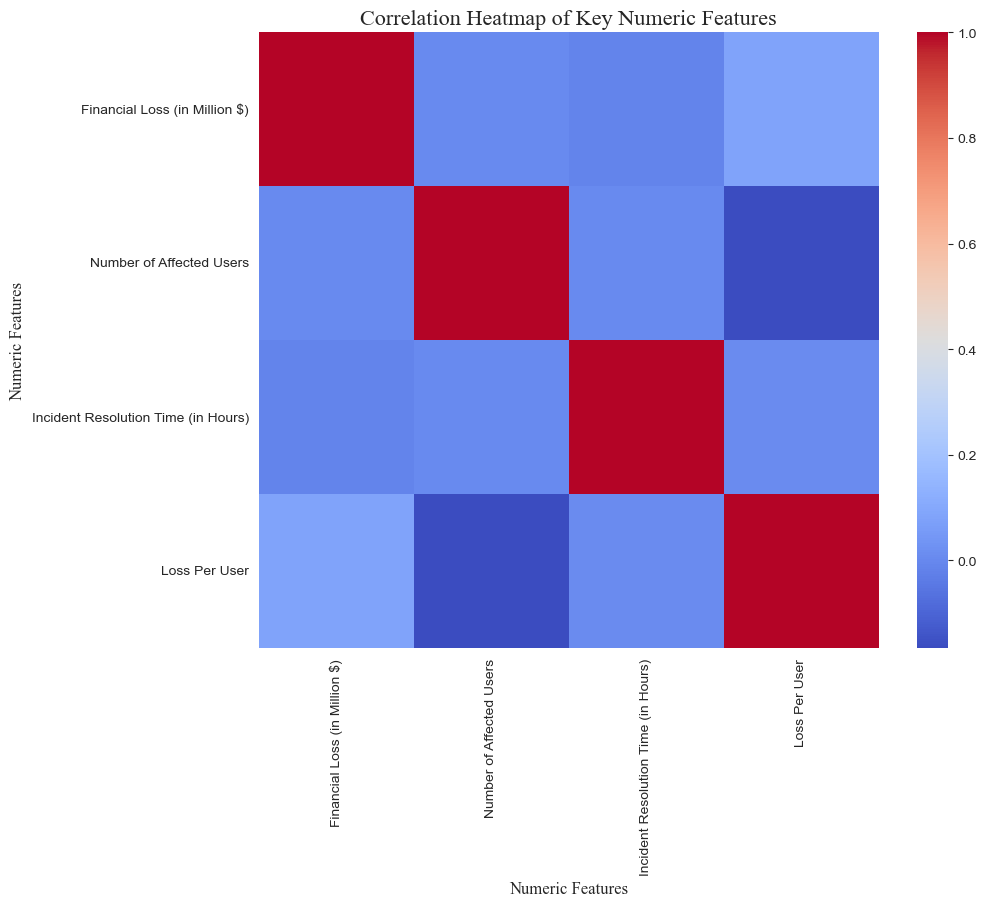

In [91]:
# Create heat map using matplot and seaborn 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

numeric_cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)', 'Loss Per User']

correlation_matrix = df[numeric_cols].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Numeric Features', fontsize=14)
plt.xlabel('Numeric Features', fontsize=12)
plt.ylabel('Numeric Features', fontsize=12)

plt.title('Correlation Heatmap of Key Numeric Features', fontsize=16, fontfamily='Times New Roman')
plt.xlabel('Numeric Features', fontsize=12, fontfamily='Times New Roman')
plt.ylabel('Numeric Features', fontsize=12, fontfamily='Times New Roman')

plt.show()

Since there is a lot of blue, there is not much correlation between variables 

*Bar Chart*

Country
Uk           16502.99
Germany      15793.24
Brazil       15782.62
Australia    15403.00
Japan        15197.34
France       14972.28
Usa          14812.12
Russia       14734.73
India        14566.12
China        13714.47
Name: Financial Loss (in Million $), dtype: float64


/var/folders/7y/htrf82kj2sn9f_7zyfls3vq80000gn/T/ipykernel_12142/1021280560.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




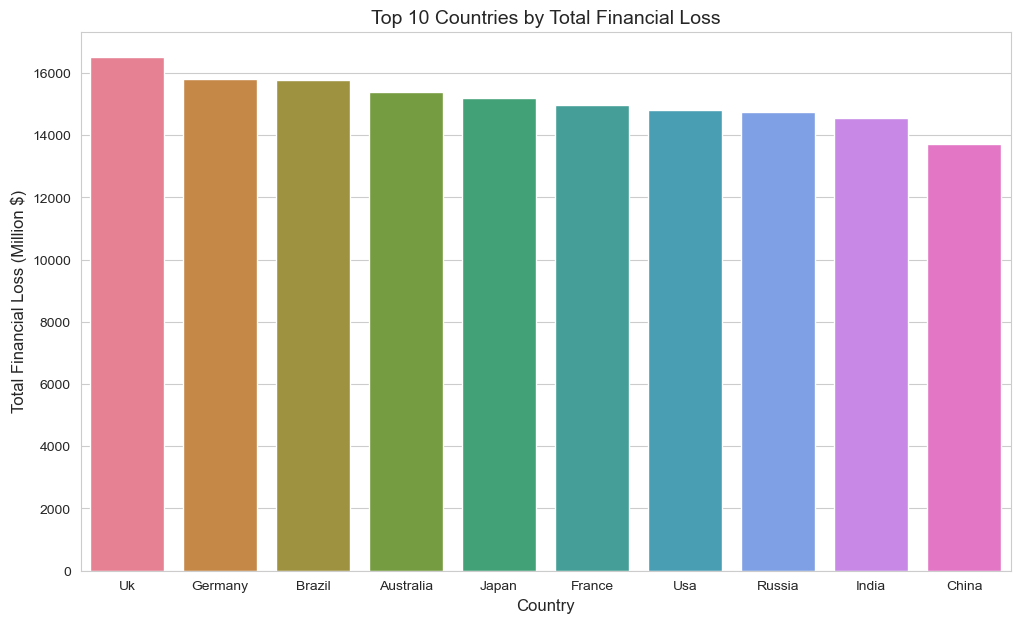

In [92]:
# Create bar graph using matplot and seaborn 

import matplotlib.pyplot as plt
import seaborn as sns

country_loss = df.groupby('Country')['Financial Loss (in Million $)'].sum()

top_10_countries = country_loss.sort_values(ascending=False)

print(top_10_countries)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='husl')
plt.title('Top 10 Countries by Total Financial Loss', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Financial Loss (Million $)', fontsize=12)
plt.show()

It is iteresting to see the top countries that we can look into using other variables like higher reporting, digital infrastructure, or global patterns of cyber vulnerability.

*Stacked Bar*

/var/folders/7y/htrf82kj2sn9f_7zyfls3vq80000gn/T/ipykernel_12142/3374594291.py:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



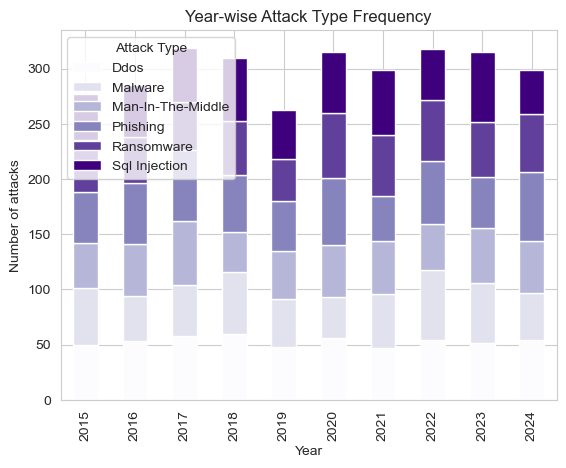

In [93]:
# Create stacked bar graph using matplot and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

pivot_table = df.pivot_table(index='Year', columns='Attack Type', aggfunc='size')

pivot_table.plot(kind='bar', stacked=True, colormap ='Purples')
plt.title('Year-wise Attack Type Frequency')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

It is a very stable amount of attacks and each attach frequency is very stable

*Distribution of Financial Loss*

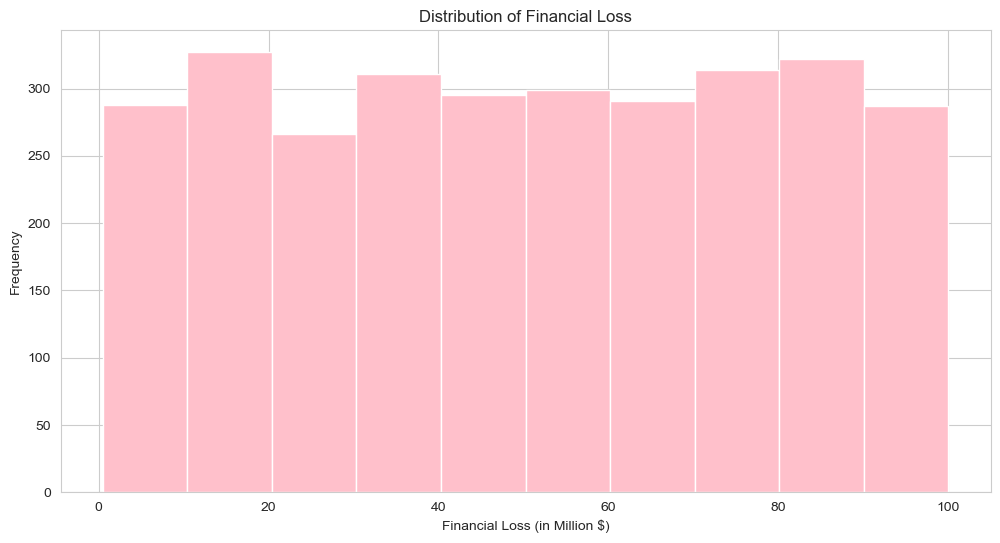

In [94]:
# Create bar graph using matplot 

import matplotlib.pyplot as plt

df['Financial Loss (in Million $)'].hist(figsize=(12,6), color='pink', edgecolor='white')
plt.title('Distribution of Financial Loss')
plt.xlabel('Financial Loss (in Million $)')
plt.ylabel('Frequency')
plt.show()

*Attack Type vs Resolution Time*

/var/folders/7y/htrf82kj2sn9f_7zyfls3vq80000gn/T/ipykernel_12142/2633061056.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




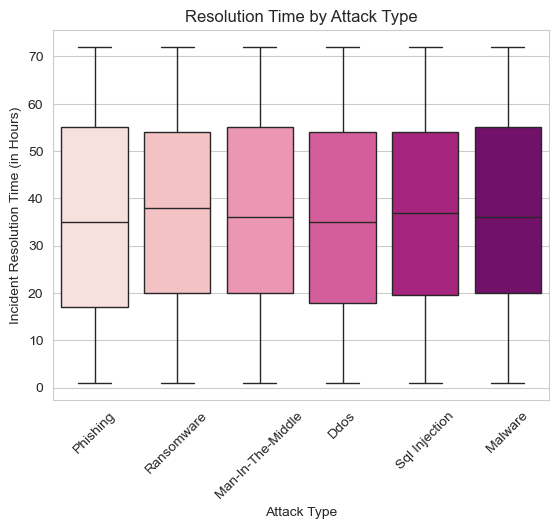

In [95]:
# Create boxplot using matplot and seaborn 

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Attack Type', y='Incident Resolution Time (in Hours)', data=df, palette='RdPu')
plt.title('Resolution Time by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Incident Resolution Time (in Hours)')
plt.xticks(rotation=45)
plt.show()

*Correlation Heat Map*

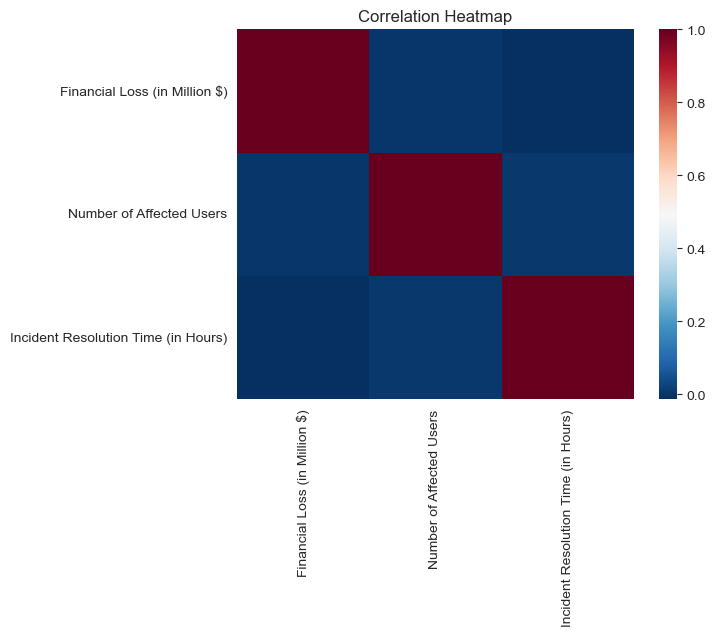

In [97]:
# Create heat map using matplot and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']].corr()

sns.heatmap(correlation_matrix, cmap='RdBu_r' )
plt.title('Correlation Heatmap')
plt.show()

Not much correlation here similar to the other heatmap. Only correlation is each variable with itself. 

*Global Financial Loss from Cyberattacks by Country* 

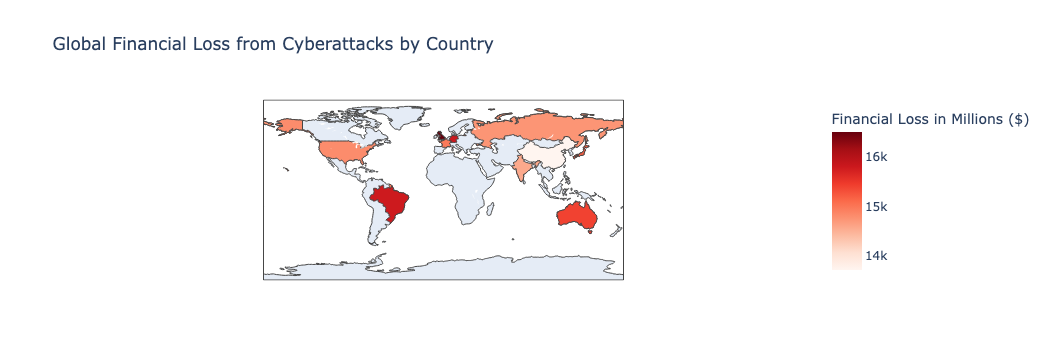

In [54]:
# Create Geomap using plotly 
import plotly.graph_objects as go

country_loss = df.groupby('Country')['Financial Loss (in Million $)'].sum().reset_index()

fig = go.Figure(go.Choropleth(
    locations=country_loss['Country'],
    locationmode='country names',
    z=country_loss['Financial Loss (in Million $)'],
    colorscale='Reds',
    colorbar_title='Financial Loss in Millions ($)'
))

fig.update_layout(title='Global Financial Loss from Cyberattacks by Country')
fig.show()

I noticed that wealthier countries have more cybersercuity issues which makes sense since they have more access to technology 

OPTIONAL RESEARCH QUESTIONS

*Countries With the Most Diverse Attack Types*

Country
Australia    6
Brazil       6
China        6
France       6
Germany      6
India        6
Japan        6
Russia       6
Uk           6
Usa          6
Name: Attack Type, dtype: int64


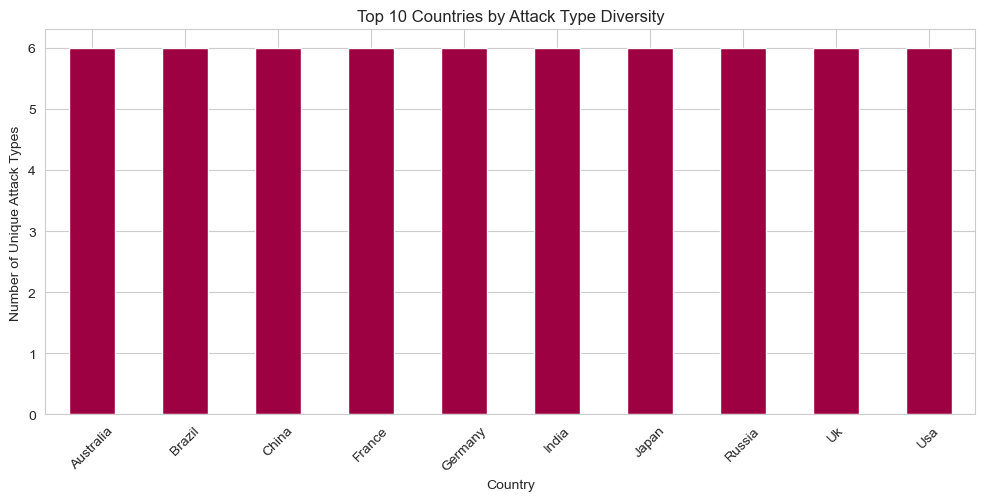

In [55]:
# Create bar graph using matplot
import matplotlib.pyplot as plt

total_attack_diversity = df.groupby('Country')['Attack Type'].nunique()

top_10_diversity = total_attack_diversity.sort_values(ascending = False).head(10)

print(top_10_diversity)

top_10_diversity.plot(kind='bar', figsize= (12,5), colormap='Spectral')
plt.title('Top 10 Countries by Attack Type Diversity')
plt.xlabel('Country')
plt.ylabel('Number of Unique Attack Types')
plt.xticks(rotation=45)
plt.show()


Since all of the countries equally had the same 6 attack types, there is no diversity among the unique attack types

*Is resolution time decreasing over the years?*

Year
2015    38.429603
2016    35.922807
2017    35.388715
2018    36.980645
2019    35.307985
2020    36.444444
2021    36.167224
2022    37.204403
2023    36.946032
2024    35.929766
Name: Incident Resolution Time (in Hours), dtype: float64


/var/folders/7y/htrf82kj2sn9f_7zyfls3vq80000gn/T/ipykernel_12142/1033458704.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



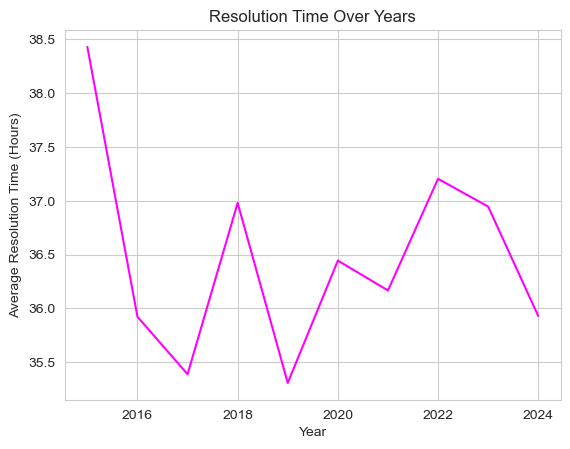

In [56]:
# Create graph using matplot 
import matplotlib.pyplot as plt

yearly_average =df.groupby('Year')['Incident Resolution Time (in Hours)'].mean()
print(yearly_average)

plt.plot(yearly_average.index, yearly_average.values, color='magenta')
plt.title('Resolution Time Over Years')
plt.xlabel('Year')
plt.ylabel('Average Resolution Time (Hours)')
plt.show()

The resolution is not specifically imporving over time. It seems to fluctuate but there is not one definite trend 

*Do certain industries recover faster than others?*

Target Industry
Banking               35.737079
Education             35.906921
Government            37.593052
Healthcare            35.806527
It                    36.169456
Retail                37.219858
Telecommunications    37.062035
Name: Incident Resolution Time (in Hours), dtype: float64


/var/folders/7y/htrf82kj2sn9f_7zyfls3vq80000gn/T/ipykernel_12142/273581036.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




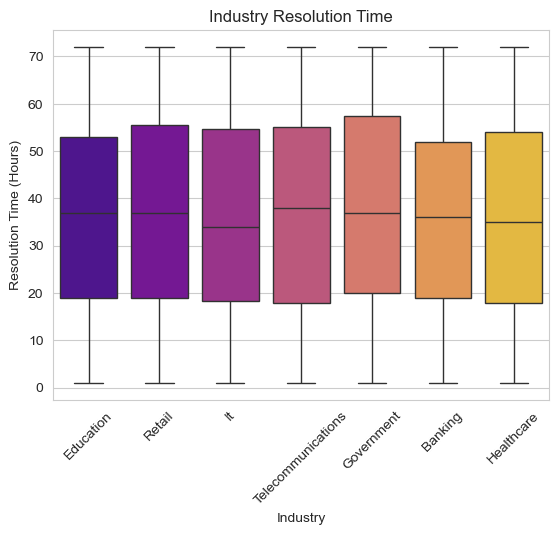

In [98]:
# Create boxplot using matplot and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

industry_average = df.groupby('Target Industry')['Incident Resolution Time (in Hours)'].mean()
print(industry_average)

sns.boxplot(x='Target Industry', y='Incident Resolution Time (in Hours)', data=df, palette='plasma')
plt.title('Industry Resolution Time')
plt.xlabel('Industry')
plt.ylabel('Resolution Time (Hours)')
plt.xticks(rotation=45)
plt.show()

The resolution times across industries are very similar